In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from toymodels import model, features

from importlib import reload

In [ ]:
reload(model)

In [ ]:
reload(features)

In [80]:
n_features = 6
n_groups = 3
n_hidden = 2

lr = 1e-10

In [91]:
fs = features.FeatureSet(n_features, n_groups)
m = model.ToyModel(n_features, n_hidden)

In [92]:
def loss(pred, labels):
    return torch.norm(labels - pred)

opt = torch.optim.SGD(list(m.parameters()), lr=lr)

In [93]:
losses = list()
for _ in range(1000):
    opt.zero_grad()
    
    sample = fs.sample()
    pred = m(sample)[0]
    
    l = loss(pred, sample)
    
    losses.append(l.item())

    l.backward()
    opt.step()

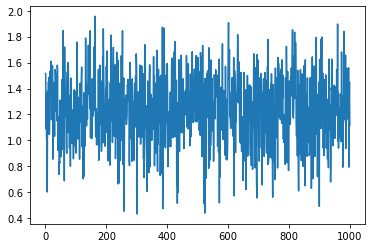

In [94]:
plt.plot(losses)

In [10]:
s = fs.sample()
m(s)

(tensor([ 0.3130,  0.2473,  0.4220,  0.0699, -0.1463,  0.2577],
        grad_fn=<AddBackward0>),
 tensor([-0.1648,  0.8066], grad_fn=<MvBackward0>))